<a href="https://colab.research.google.com/github/cecilia-wanja/2nd-analysis-of-financial-inclusion-in-East-Africa/blob/master/Financial_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTION:**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa.
In East Africa, only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. My solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# HYPOTHESIS:

H0: The female individuals in East Africa are most likely to have financial inclusion.

H1:The male individuals are most likely to have financial inclusion.

# **METRIC FOR SUCCESS**

We will create a prediction model that facilitates the financial inclusion prediction in the next couple of years.This will enable us to improve the economic and human development in Africa.Int his study we have a sample across Kenya, Rwanda, Tanzania, and Uganda.We will ascertain that this model is successful if it fulfills the following conditions:


*   If the Accuracy level of our model is above 85%.
*   If the model answers our research question at hand,which is  how we can predict which individuals are most likely to have or use a bank account. 
*   If the level of significance is above 95%

# CONTEXT


1.  Cleaning my data
2.   Performing the z test on my data
3.  Finding critical values
4.  Either rejecting or failing to reject my test statistic based on my findings
5.  Performing Univariate analysis
6.  Performing bivariate analysis
7. Performing multivariate analysis
8.  Model making
9.  Exploratory analysis

# **Appropriateness of data**







In [0]:
# Data visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas_profiling as pp

In [99]:
#Looking at the first few rows
country=pd.read_csv("http://bit.ly/FinancialDataset")
country.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


*1.  Cleaning of data*

Here, we will perform a series of functions to polish and easen our data for analysis.

In [100]:
#Getting a list of the column names for assessing
country.columns.values

array(['country', 'year', 'uniqueid', 'Has a Bank account',
       'Type of Location', 'Cell Phone Access', 'household_size',
       'Respondent Age', 'gender_of_respondent', 'The relathip with head',
       'marital_status', 'Level of Educuation', 'Type of Job'],
      dtype=object)

In [0]:
#dropped the unnecessary column
country.drop(["uniqueid"],axis=1,inplace=True)


In [102]:
#Renaming the columns for uniformity
country = country.rename(columns={"country":"Country","year":"Year","Has a Bank account":"Bank_account","Type of Location":"Location","Cell Phone Access":"Cell_phone_access","Respondent Age":"Age","The relathip with head":"Relationship","Level of Educuation":"Education_level","Type of Job":"Job_type"})
country.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [103]:
#Calling out the column names again.
country.columns.values
#Renaming is successful.

array(['Country', 'Year', 'Bank_account', 'Location', 'Cell_phone_access',
       'household_size', 'Age', 'gender_of_respondent', 'Relationship',
       'marital_status', 'Education_level', 'Job_type'], dtype=object)

In [104]:
#Identifying missing data
country.isnull().any()
#we realise that every column has null values except the column "Year"

Country                  True
Year                    False
Bank_account             True
Location                 True
Cell_phone_access        True
household_size           True
Age                      True
gender_of_respondent     True
Relationship             True
marital_status           True
Education_level          True
Job_type                 True
dtype: bool

In [105]:
#Dealing with missing data(null values)
#by deleting them
country = country.dropna()
country.isnull().any()

Country                 False
Year                    False
Bank_account            False
Location                False
Cell_phone_access       False
household_size          False
Age                     False
gender_of_respondent    False
Relationship            False
marital_status          False
Education_level         False
Job_type                False
dtype: bool

In [106]:
#getting to know the datatype information in each column
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
Country                 23343 non-null object
Year                    23343 non-null int64
Bank_account            23343 non-null object
Location                23343 non-null object
Cell_phone_access       23343 non-null object
household_size          23343 non-null float64
Age                     23343 non-null float64
gender_of_respondent    23343 non-null object
Relationship            23343 non-null object
marital_status          23343 non-null object
Education_level         23343 non-null object
Job_type                23343 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


In [107]:
#Detecting Anomalies in our data set
country.Year.unique()
#The year 2039, 2029 and 2056 are our anomalies

array([2018, 2029, 2056, 2016, 2039, 2017])

In [108]:
#Resolving anomalies
ind = country[country['Year'] > 2018].index
ind
country = country.drop(ind)
country['Year'].unique()

array([2018, 2016, 2017])

In [109]:
#Anomalies in the education level column
country.Education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [0]:
ano = country[country["Education_level"] == 6].unique()
ano
country = country.drop(ano)
country["Education_level"].unique()

In [112]:
#previewing our data
country.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


2. *UNIVARIATE ANALYSIS*

In [113]:
pp.ProfileReport(country)

Number of variables,13
Number of observations,23340
Total Missing (%),0.0%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,4
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [114]:
country.describe()
#This gives the ststitsical results of each of the numerical columns
#We'll take a look at the household_size and Age column
#The mean value of the household_size is 3.688560 meaning most of the household sizes rotate around that value.
#The mean value of the Age column is 38.807069,meaning the age of most of the people from the sample rotates around that figure, most of the people are mid aged.


,Year,household_size,Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [115]:
#skewness
country.skew()
#The Age and Household size column, both exhibit positive skewness or right skewness.The mean is therefore greater than the median, which is always greater than the mode.

Year              0.042833
household_size    0.974183
Age               0.840615
dtype: float64

In [116]:
#kurtosis of the data
country.kurt()
#The household size has a positive kurtosis hence distribution has heavier tails and a sharper peak than the normal distribution.
#The Age has a kurtosis close to 0 hence it is almost similar to a a normal distribtion.

Year             -1.611829
household_size    1.153836
Age               0.098268
dtype: float64

In [0]:
#range of Age column
maxage = country.Age.max()
minage = country.Age.min()
range = maxage - minage
range
#All the ages are spread in 84  years

In [118]:
#range of household size column
maxhousehold = country.household_size.max()
minhousehold = country.household_size.min()
range = maxhousehold - minhousehold
range
#The household sizes are spread in 21 different sizes

21.0

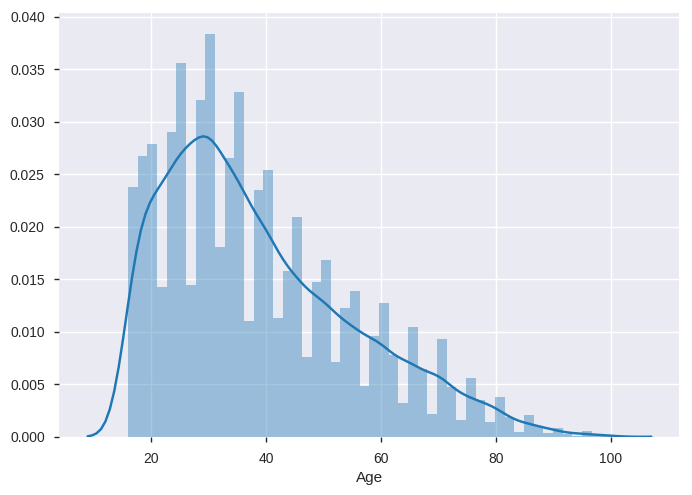

In [119]:
#histogram displaying the column Age
#It is rightly inclined hence the mean is greater than the median, which is always greater than the mode.
sns.distplot(country['Age'], kde=True)

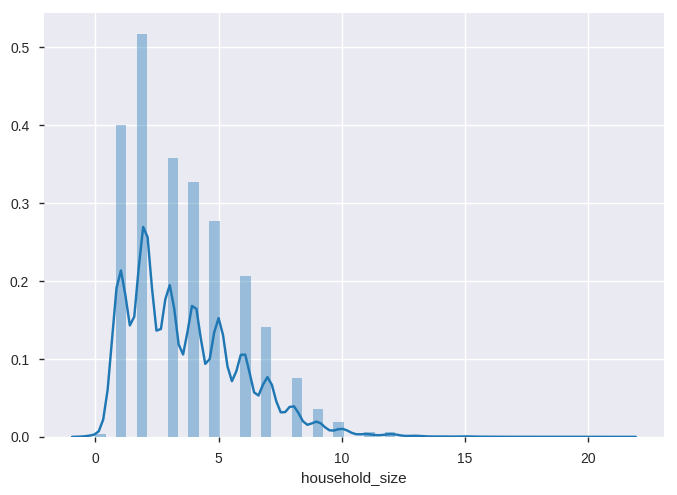

In [120]:
#histogram displaying the column household size
sns.distplot(country['household_size'], kde=True)
#It is rightly inclined hence the mean is greater than the median, which is always greater than the mode.

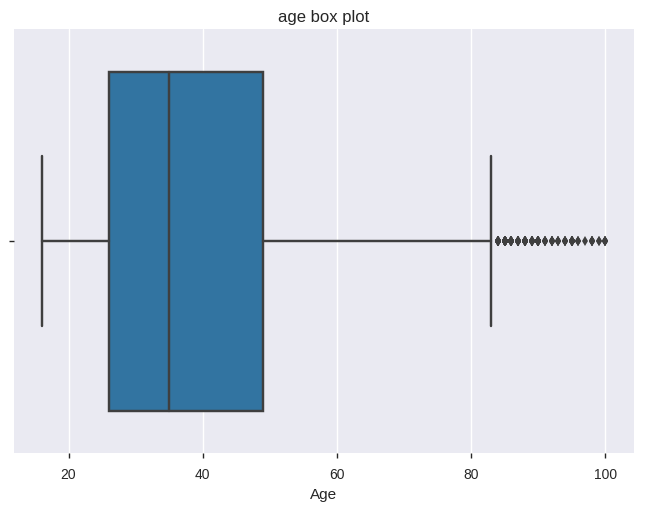

In [121]:
#Boxplot displaying the column age
#The data is tightly grouped
#There are presence of outliers in the column that were retained since they proved useful
agecolumn=country.Age
sns.boxplot(agecolumn)
plt.title("age box plot")
plt.show()

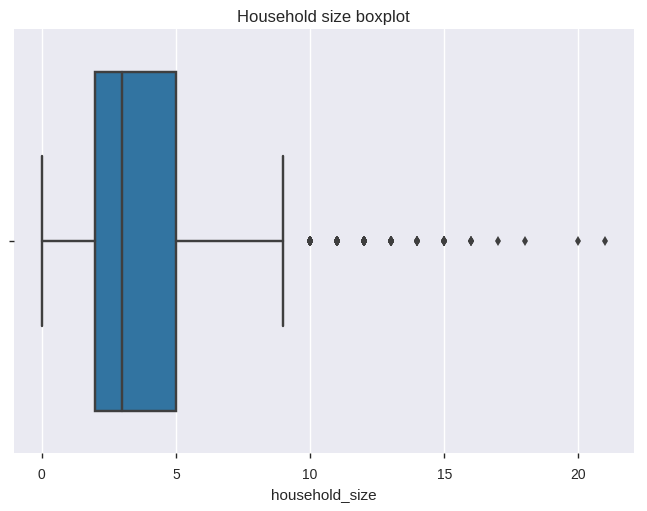

In [122]:
household_size = country.household_size
sns.boxplot(household_size)
plt.title("Household size boxplot")
plt.show()

In [123]:
bank = country.groupby(["Bank_account", "Country"])
bank



In [124]:
bank.describe()

Year                       ...   Age                   
                        count    mean  std     min  ...   25%   50%   75%    max
Bank_account Country                                ...                         
No           Kenya     4543.0  2018.0  0.0  2018.0  ...  25.0  35.0  50.0   95.0
             Rwanda    7686.0  2016.0  0.0  2016.0  ...  27.0  35.0  50.0   99.0
             Tanzania  5901.0  2017.0  0.0  2017.0  ...  25.0  35.0  48.0  100.0
             Uganda    1914.0  2018.0  0.0  2018.0  ...  23.0  31.0  45.0   98.0
Yes          Kenya     1519.0  2018.0  0.0  2018.0  ...  29.0  38.0  50.0   95.0
             Rwanda     997.0  2016.0  0.0  2016.0  ...  30.0  36.0  45.0   95.0
             Tanzania   599.0  2017.0  0.0  2017.0  ...  28.0  36.0  47.0   86.0
             Uganda     181.0  2018.0  0.0  2018.0  ...  26.0  31.0  40.0   75.0

[8 rows x 24 columns]

From the above observation,  numerous people have no bank account.With Rwanda topping the list.Clearly stating that the most needs to be done in the country.Closely followed by Tanzania,Kenya then Uganda.
The number of people with financial inclusion proved to be less than the overall number of people with no financial inclusion, with Kenya topping the list followed by Rwanda,Tanzania then Uganda.

In [125]:
bank2 = country.groupby(["Bank_account", "Year"])
bank2


In [126]:
bank2.describe()

household_size                      ...   Age             
                           count      mean       std  ...   50%   75%    max
Bank_account Year                                     ...                   
No           2016         7686.0  4.462139  1.979547  ...  35.0  50.0   99.0
             2017         5901.0  1.946789  1.067652  ...  35.0  48.0  100.0
             2018         6457.0  4.425740  2.562075  ...  34.0  49.0   98.0
Yes          2016          997.0  4.641926  1.980621  ...  36.0  45.0   95.0
             2017          599.0  1.782972  0.910535  ...  36.0  47.0   86.0
             2018         1700.0  3.549412  2.264818  ...  37.0  50.0   95.0

[6 rows x 16 columns]

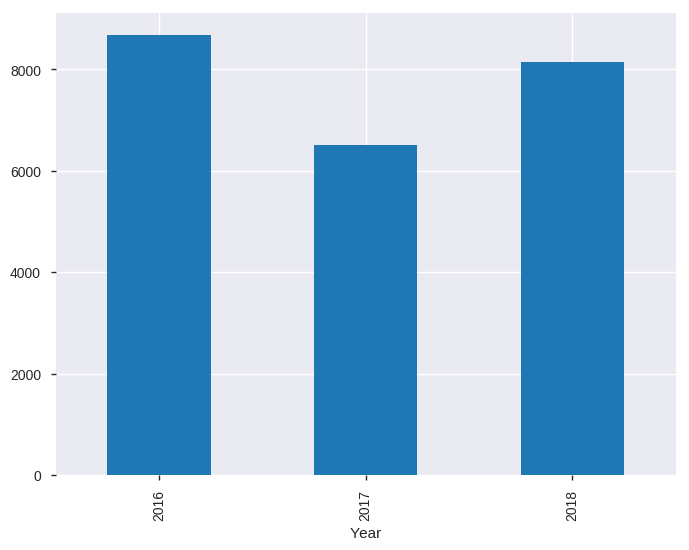

In [127]:
finance = country.groupby(['Year'])['Year'].count()
finance

finance.plot(kind='bar', figsize=(8, 6))
plt.show()


In the above results we clearly see that, from the year 2016 to 2017 the number of people with financial inclusion decreased due to unknown reasons.This changed in the year 2018, where the numbers increased from the year 2017.

In [128]:
country.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


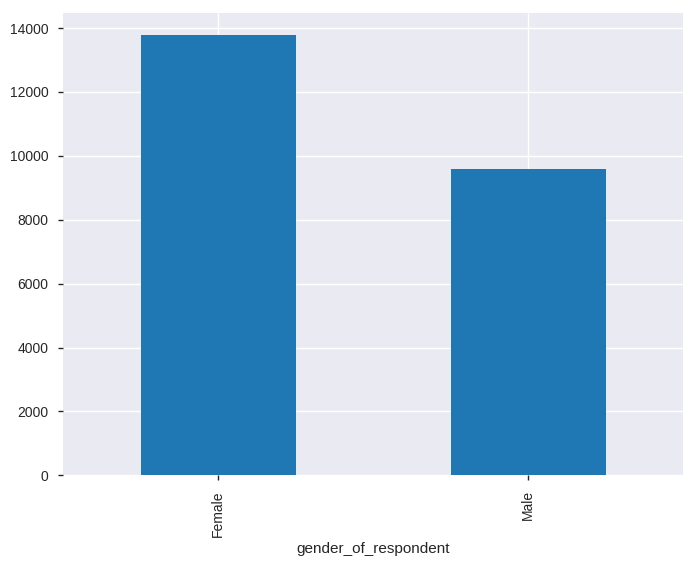

In [129]:
finance1 = country.groupby(['gender_of_respondent'])['gender_of_respondent'].count()
finance1

finance1.plot(kind='bar', figsize=(8, 6))
plt.show()
#The females show a larger number in financial inclusion as compared to the male

Hypothesis testing

In [0]:
#Here we will find the critical value using the z test concerning the variables at hand which is directly related to our hypothesis
#The gender of repondent column
#H0: The female individuals in East Africa are most likely to have financial inclusion.

#H1:The male individuals are most likely to have financial inclusion.
#We have used the z test instead of the t test since the sample n>30. 

In [0]:
#Once we plot the gender of the respondent to a bar graph, it does not show normal distribution.
#The z test cannot therefore be carried out since it requires a normal distribution sample.

3.  *BIVARIATE ANALYSIS*

 The simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.


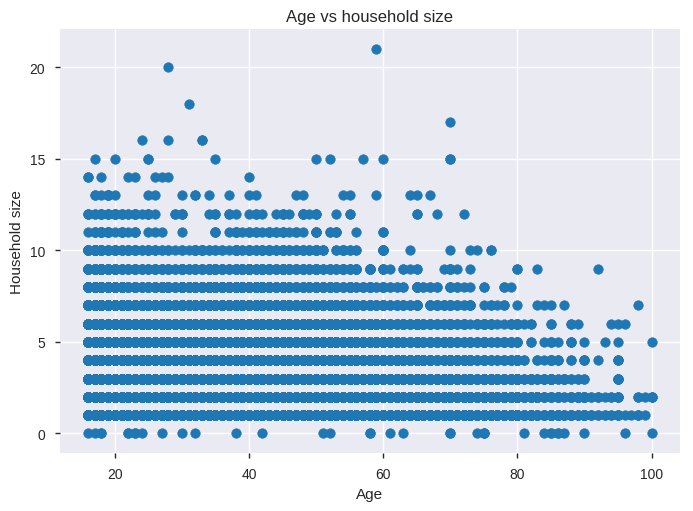

In [130]:
#scatter plot 
#Age vs household size
plt.scatter(country["Age"],country["household_size"])
plt.title("Age vs household size")
plt.xlabel("Age")
plt.ylabel("Household size")
plt.show()
#The distribution is not normal, but is inclined more to the young people as compared to the old people

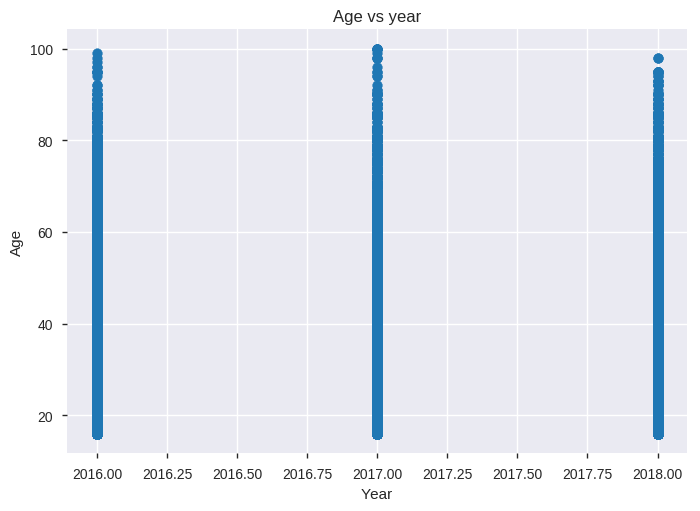

In [131]:
#scatter plot between age and year
plt.scatter(country["Year"],country["Age"])
plt.title("Age vs year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()
#In each of those years the distribution starts becoming scarce as we progress to the older people

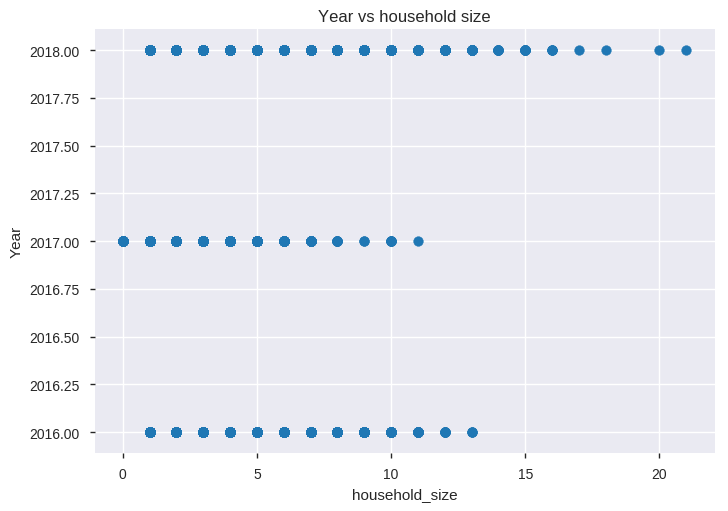

In [132]:
#year vs household size
plt.scatter(country["household_size"],country["Year"])
plt.title("Year vs household size")
plt.xlabel("household_size")
plt.ylabel("Year")
plt.show()
#the transition from 2016 to 2017 showed a reduction in the household size by the families in the survey, but the number showed a steady increse in the year 2018.

In [133]:
#correlation between the two variables
corr = country["Age"].corr(country["household_size"],method = "pearson")
corr
#no correlation at all between the two variables

-0.11967115234154871

In [134]:
#correlation between the two variables
corr = country["Age"].corr(country["Year"],method = "pearson")
corr
#no correlation at all between the two variables

-0.01855420810674347

In [135]:
#correlation between the two variables
corr = country["Year"].corr(country["household_size"],method = "pearson")
corr
#no correlation at all between the two variables

-0.05248406515317324

*4.  MULTIVARIATE ANALYSIS*

Here we will be observing and analysing more than one statistical outcome variable at a time.

In [0]:
#There are anumber of ways to carry out multivariate analysis including; Factor analysis, Principal Component Analysis, Canonixcal Correlation and many more.
#In this kind of sample, we will use the principal component analysis since it calculates an uncorrelated set of variables known as factors or principal components. 
#These factors are ordered so that the first few retain most of the variation present in all of the original variables. 
#Unlike its cousin Factor Analysis, PCA always yields the same solution from the same data.

In [136]:
country.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [214]:
#Since PCA deals with numerical values(bearing in mind thats some columns have categorical data), we have to change these values into numerical data to easen analysis.
#Creating Dummy Variables to perform Principal Component Analysis easily and accurately with all the associated variable
import dask.dataframe as dd
dummy = dd.get_dummies(country)
dummy.head()

,Year,household_size,Age,Country_Kenya,Country_Rwanda,Country_Tanzania,Country_Uganda,Bank_account_No,Bank_account_Yes,Location_Rural,Location_Urban,Cell_phone_access_No,Cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,Relationship_Child,Relationship_Head of Household,Relationship_Other non-relatives,Relationship_Other relative,Relationship_Parent,Relationship_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Education_level_6,Education_level_No formal education,Education_level_Other/Dont know/RTA,Education_level_Primary education,Education_level_Secondary education,Education_level_Tertiary education,Education_level_Vocational/Specialised training,Job_type_Dont Know/Refuse to answer,Job_type_Farming and Fishing,Job_type_Formally employed Government,Job_type_Formally employed Private,Job_type_Government Dependent,Job_type_Informally employed,Job_type_No Income,Job_type_Other Income,Job_type_Remittance Dependent,Job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [159]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and Y respectively.
x = country.drop("Bank_account",1)
y = country["Bank_account"]
x.head()


,Country,Year,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [138]:
#To get the dimensions of our dummy data.
dummy.shape

(23340, 43)

In [143]:
x.shape

(23340, 11)

In [144]:
y.shape

(23340,)

In [0]:
#creating dummy for the categorical data
x = pd.get_dummies(x)

In [198]:
#splitting the dats into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test

(       Year  ...  Job_type_Self employed
 17753  2017  ...                       1
 634    2018  ...                       0
 9500   2016  ...                       0
 7074   2016  ...                       0
 2748   2018  ...                       0
 7178   2016  ...                       0
 3447   2018  ...                       0
 3400   2018  ...                       0
 7890   2016  ...                       0
 17041  2017  ...                       0
 10450  2016  ...                       0
 10266  2016  ...                       0
 11208  2016  ...                       0
 7639   2016  ...                       0
 16665  2017  ...                       0
 11554  2016  ...                       0
 4898   2018  ...                       0
 21285  2017  ...                       1
 3038   2018  ...                       0
 8065   2016  ...                       0
 2120   2018  ...                       0
 12926  2016  ...                       0
 18703  2017  ...                 

In [195]:
#Standardisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train
x_test

array([[ 0.09520744],
       [-0.72905505],
       [-0.18145845],
       ...,
       [-1.1708134 ],
       [ 0.1485568 ],
       [-0.44210703]])

In [200]:
x_test.shape

(5835, 41)

In [201]:
y_test.shape

(5835, 2)

In [192]:
#Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[ 0.19442321],
       [-1.48880411],
       [-0.3705565 ],
       ...,
       [-2.39091931],
       [ 0.303368  ],
       [-0.90282725]])

In [222]:
#Training our model and Making predictions using 1 Principal component
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [223]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [189]:
y_pred.shape

(5835,)

In [190]:
y_test.shape

(4668, 2)

In [182]:
#Explained Variance Ratio
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10171163, 0.07253782])

So here you can see that one component contributes to approximately 17% of the total variance.

In [207]:
#Using the 3 Principal Components
from sklearn.decomposition import PCA
x = country.drop("Bank_account",1)
y = country["Bank_account"]
x = pd.get_dummies(x)
y = pd.get_dummies(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[ 0.19441218,  2.4311487 , -0.43338256],
       [-1.48886889,  0.73289425, -1.82224203],
       [-0.37055472,  0.93181661, -2.31619349],
       ...,
       [-2.39091911, -1.71273107, -1.41962904],
       [ 0.30344051, -1.7314885 ,  2.23134644],
       [-0.90281016,  2.65267677,  1.89540729]])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


In [210]:
#Explained Variance Ratio
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10171163, 0.07253783, 0.06972438])

2 principal components result to a 0.247 variance which is not workable in this analysis...we will hence try using all the principal components

In [218]:
x = country.drop('Bank_account', 1)
y = country['Bank_account']
from sklearn.model_selection import train_test_split
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test


array([[ 1.20207548, -1.17433718, -0.35120743, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.01082455, -1.01769419, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  0.5737922 , -1.19946331, ..., -0.22160018,
        -0.34761413, -0.61143302],
       ...,
       [-1.15548487, -0.30027249, -1.13887361, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689,  1.16353523, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548, -1.17433718,  2.61768817, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [219]:
#Explained Variance Ratio
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10171163, 0.07253783, 0.06972438])

As stated in our metric  of success that our model will be a success if the accuarcy level is above 85%
We can therefore say that the model was a total success sice it outdid our expectation with an accuracy of 86%.
We then concluse that the model answers our research question at hand,which is how we can predict which individuals are most likely to have or use a bank account.Data that is analysed using this model will therefore have an accuracy of 86%.


